In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Train

In [207]:
train = pd.read_csv('train.csv')
train.head()

,customer_id,song_id,score
0,O29219,3459,3
1,I50343,5326,4
2,N42888,236,5
3,F5740,724,4
4,K4115,8452,5


In [208]:
train['First_Customer_id'] = train['customer_id'].astype(str).str[0]
train['First_Customer_id'].unique()

array(['O', 'I', 'N', 'F', 'K', 'J', 'G', 'H', 'L', 'M'], dtype=object)

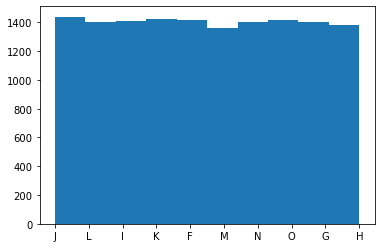

In [63]:
ct_id = train.drop_duplicates(subset=['customer_id', 'First_Customer_id'], keep='last')
plt.hist(ct_id['First_Customer_id']);

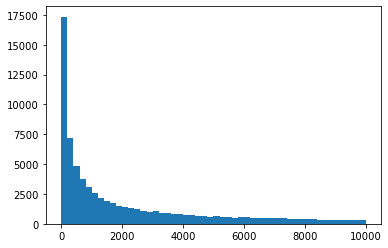

In [34]:
plt.hist(train[train['First_Customer_id']=='O']['song_id'], bins=50);

In [4]:
train.shape

(710109, 3)

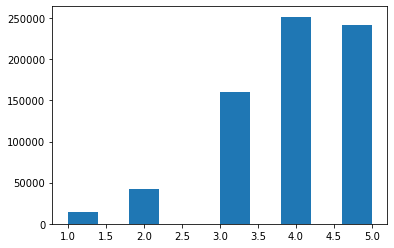

In [6]:
plt.hist(train['score']); # most of the review are greater than the median 3

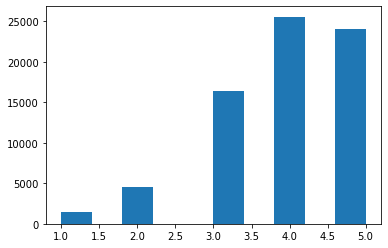

In [39]:
plt.hist(train[train['First_Customer_id']=='I']['score']);

In [5]:
train['score'].unique()

array([3, 4, 5, 2, 1])

In [7]:
train['score'].mean()

3.93510855375724

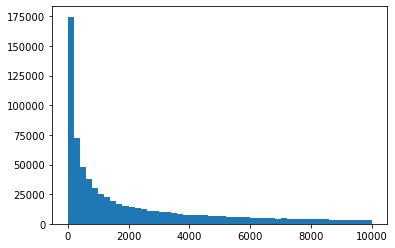

In [51]:
plt.hist(train['song_id'], bins=50);

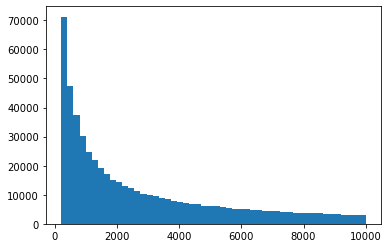

In [50]:
plt.hist(train[train['song_id']>200]['song_id'], bins=50);

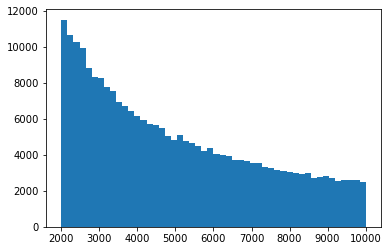

In [47]:
plt.hist(train[train['song_id']>2000]['song_id'], bins=50);

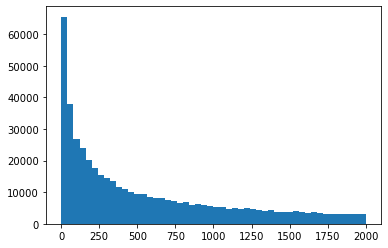

In [48]:
plt.hist(train[train['song_id']<2000]['song_id'], bins=50);

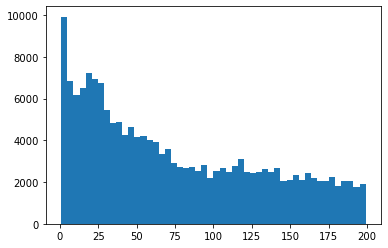

In [49]:
plt.hist(train[train['song_id']<200]['song_id'], bins=50);

TODO: Check patterns in average ratings of users and average ratings of songs

Can we divide songs into categories? Most listened/less listened? will it be useful to make seperate models for them?

(array([83696., 82903., 81637., 79754., 78465., 78737., 73365., 67581.,
        53752., 30219.]),
 array([    0. ,  1405.2,  2810.4,  4215.6,  5620.8,  7026. ,  8431.2,
         9836.4, 11241.6, 12646.8, 14052. ]),
 <BarContainer object of 10 artists>)

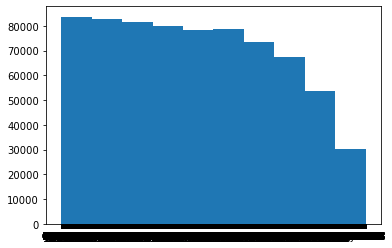

In [9]:
plt.hist(train['customer_id'])

In [10]:
matrix = train.pivot(index='customer_id', columns='song_id', values='score')

In [11]:
matrix.shape

(14053, 10000)

sparsity

In [12]:
train.shape[0]/(matrix.shape[0]*matrix.shape[1])*100 # only 0.5% are filled :(

0.5053077634668753

# Test

In [141]:
test = pd.read_csv('test.csv')
test.head()

,customer_id,song_id
0,J24644,5304
1,G29701,123
2,M29977,11
3,H50752,1445
4,J42394,271


In [14]:
test.shape

(670681, 2)

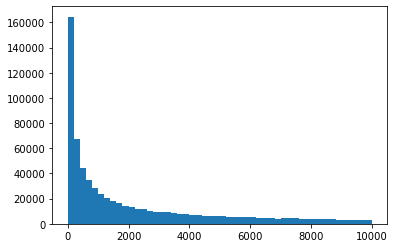

In [42]:
plt.hist(test['song_id'], bins = 50);

In [43]:
plt.hist(test['customer_id']);

Error in callback <function flush_figures at 0x7fd8775dcc20> (for post_execute):


KeyboardInterrupt: 

In [17]:
test.merge(train[['customer_id', 'song_id']], how = 'inner' ,indicator=False) #obvious thing but had to check out

,customer_id,song_id


# Save for later

In [44]:
save_later_df = pd.read_csv('save_for_later.csv')

In [19]:
save_later_df.head()

,customer_id,song_id
0,F22180,1140
1,N34498,1523
2,K46875,6918
3,L50176,5828
4,F13830,3039


Average no. of songs per user

In [20]:
save_later_df.shape[0]/len(save_later_df['customer_id'].unique())

18.66395812172826

In [21]:
save_later_df.shape

(238880, 2)

In [22]:
save_later_df.merge(test, how = 'inner' ,indicator=False)

,customer_id,song_id
0,L32416,239
1,K24885,1001
2,O21209,275
3,J41494,3383
4,H24142,6098
...,...,...
365,L42416,406
366,N32428,10
367,L10266,493
368,L39296,8381


In [23]:
save_later_train = save_later_df.merge(train, how = 'inner' ,indicator=False)

In [24]:
save_later_train

,customer_id,song_id,score
0,K31035,349,4
1,G10971,4367,4
2,K11275,482,4
3,K13255,359,4
4,O46789,377,5
...,...,...,...
333,H47412,89,3
334,K17645,5,4
335,F19610,3832,2
336,F4870,106,5


(array([  5.,   0.,  12.,   0.,   0.,  77.,   0., 126.,   0., 118.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

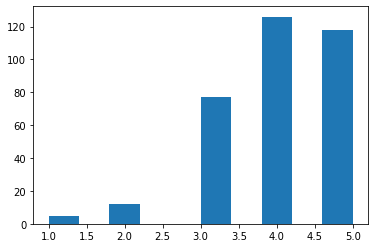

In [25]:
plt.hist(save_later_train['score'])

In [26]:
save_later_train['score'].mean() #we can use this mean for adding save_later into our matrix

4.005917159763314

# Song Labels

In [209]:
song_labels = pd.read_csv('song_labels.csv')
song_labels.head()

,platform_id,label_id,count
0,Q207781,10304,6
1,S961833,29011,15
2,X6718608,25148,29
3,Q16134551,8717,774
4,V7126,15169,120


In [8]:
song_labels.shape

(999912, 3)

In [9]:
len(song_labels['platform_id'].unique())

10000

In [7]:
len(song_labels['label_id'].unique())

34252

# Songs

In [210]:
songs = pd.read_csv('songs.csv')
songs.head()

,song_id,platform_id,released_year,language,number_of_comments
0,8328,T17332564,2013.0,eng,1936
1,8591,T773514,1925.0,eng,420
2,718,U10975,1929.0,eng,5485
3,6593,Y12839,1968.0,NaN,200
4,743,Q28881,2002.0,en-US,10411


In [211]:
songs['First_song_id'] = songs['platform_id'].astype(str).str[0]
songs['First_song_id'].unique()

array(['T', 'U', 'Y', 'Q', 'W', 'R', 'X', 'P', 'S', 'V'], dtype=object)

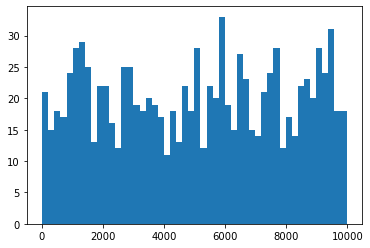

In [66]:
plt.hist(songs[songs['First_song_id']=='P']['song_id'], bins =50);

In [212]:
songs[songs['number_of_comments'].isnull()] = 0

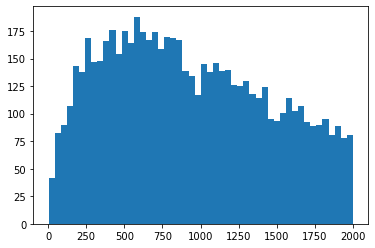

In [68]:
plt.hist(songs[songs['number_of_comments']<2000]['number_of_comments'], bins =50);

In [ ]:
plt.hist(songs[songs['First_song_id']=='P']['song_id'], bins =50);

In [213]:
train = train.merge(songs, how = 'outer' , on = 'song_id')

In [214]:
train.drop_duplicates(subset=['song_id', 'customer_id'], keep='last')

,customer_id,song_id,score,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id
0,O29219,3459,3,O,P49540,1782.0,eng,1066.0,P
1,L50966,3459,4,L,P49540,1782.0,eng,1066.0,P
2,K26985,3459,4,K,P49540,1782.0,eng,1066.0,P
3,J44634,3459,3,J,P49540,1782.0,eng,1066.0,P
4,L15696,3459,4,L,P49540,1782.0,eng,1066.0,P
...,...,...,...,...,...,...,...,...,...
710104,O17409,7249,5,O,W100247,2002.0,eng,836.0,W
710105,I51183,7249,5,I,W100247,2002.0,eng,836.0,W
710106,F43000,7249,5,F,W100247,2002.0,eng,836.0,W
710107,K3435,7249,2,K,W100247,2002.0,eng,836.0,W


In [47]:
train.head()

,customer_id,song_id,score,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id
0,O29219,3459,3,O,P49540,1782.0,eng,1066.0,P
1,L50966,3459,4,L,P49540,1782.0,eng,1066.0,P
2,K26985,3459,4,K,P49540,1782.0,eng,1066.0,P
3,J44634,3459,3,J,P49540,1782.0,eng,1066.0,P
4,L15696,3459,4,L,P49540,1782.0,eng,1066.0,P


In [215]:
train[train['number_of_comments'].isnull()] = 0

In [49]:
train['number_of_comments'].max()

155254.0

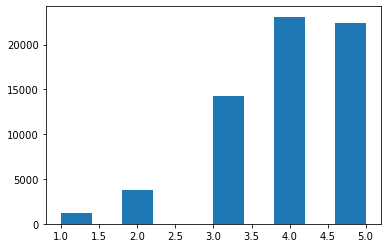

In [89]:
plt.hist(train[train['First_song_id']=='T']['score']);

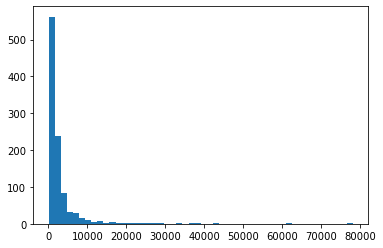

In [87]:
plt.hist(songs[songs['First_song_id']=='T']['number_of_comments'], bins=50);

In [216]:
train[train['score']=='5']['number_of_comments']

Series([], Name: number_of_comments, dtype: float64)

Song_id vs number_of_comments

In [217]:
songs_edited = (train.groupby(["song_id"]).mean())
songs_edited = songs_edited.reset_index()
songs_edited.head()

,song_id,score,released_year,number_of_comments
0,0,0.000000,0.0,0.0
1,1,4.282920,2008.0,155254.0
2,2,4.370719,1997.0,75867.0
3,3,3.267586,2005.0,95009.0
4,4,4.309524,1960.0,72586.0


In [218]:
cust_edited = train.groupby(["customer_id"]).mean()
cust_edited = cust_edited.reset_index()
cust_edited.head()

,customer_id,song_id,score,released_year,number_of_comments
0,0,0.000000,0.000000,0.000000,0.000000
1,F100,2800.642857,3.428571,1922.160714,8454.571429
2,F10040,1621.125000,4.553571,1901.857143,14904.089286
3,F10050,2409.557143,3.585714,1999.785714,11092.728571
4,F10070,976.685185,3.037037,1983.074074,21279.833333


In [219]:
train = train.merge(songs_edited, how = 'outer' , on = 'song_id')
train.head()

,customer_id,song_id,score_x,First_Customer_id,platform_id,released_year_x,language,number_of_comments_x,First_song_id,score_y,released_year_y,number_of_comments_y
0,O29219,3459,3,O,P49540,1782.0,eng,1066.0,P,4.069767,1782.0,1066.0
1,L50966,3459,4,L,P49540,1782.0,eng,1066.0,P,4.069767,1782.0,1066.0
2,K26985,3459,4,K,P49540,1782.0,eng,1066.0,P,4.069767,1782.0,1066.0
3,J44634,3459,3,J,P49540,1782.0,eng,1066.0,P,4.069767,1782.0,1066.0
4,L15696,3459,4,L,P49540,1782.0,eng,1066.0,P,4.069767,1782.0,1066.0


In [220]:
train = train.rename(columns={'score_x': 'score', 'released_year_x': 'released_year', 
                              'number_of_comments_x': 'number_of_comments', 'score_y':'song_avg'})
train = train.drop(['released_year_y','number_of_comments_y'], axis=1)

In [221]:
train = train.merge(cust_edited, how = 'outer' , on = 'customer_id')
train = train.rename(columns={'score_x': 'score', 'released_year_x': 'released_year', 
                              'number_of_comments_x': 'number_of_comments', 'score_y':'cust_avg'})
train = train.drop(['released_year_y','number_of_comments_y'], axis=1)
train.head()

,customer_id,song_id_x,score,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id,song_avg,song_id_y,cust_avg
0,O29219,3459,3,O,P49540,1782.0,eng,1066.0,P,4.069767,1813.880597,3.029851
1,O29219,12,1,O,W13335037,2011.0,eng,101023.0,W,4.093750,1813.880597,3.029851
2,O29219,18,3,O,U5,1999.0,eng,36099.0,U,4.421668,1813.880597,3.029851
3,O29219,17,3,O,X6148028,2009.0,eng,88538.0,X,4.152371,1813.880597,3.029851
4,O29219,332,3,O,U65605,1953.0,eng,8690.0,U,3.863636,1813.880597,3.029851


In [222]:
train = train.rename(columns={'song_id_x': 'song_id'})
train = train.drop(['song_id_y'], axis=1)
train.head()

,customer_id,song_id,score,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id,song_avg,cust_avg
0,O29219,3459,3,O,P49540,1782.0,eng,1066.0,P,4.069767,3.029851
1,O29219,12,1,O,W13335037,2011.0,eng,101023.0,W,4.093750,3.029851
2,O29219,18,3,O,U5,1999.0,eng,36099.0,U,4.421668,3.029851
3,O29219,17,3,O,X6148028,2009.0,eng,88538.0,X,4.152371,3.029851
4,O29219,332,3,O,U65605,1953.0,eng,8690.0,U,3.863636,3.029851


In [223]:
train= train[train['customer_id'] != 0]
train.shape

(709191, 11)

In [224]:
train.loc[train['First_song_id'].isnull(),['First_song_id']] = 'O'

train.loc[train['released_year'].isnull(),['released_year']] = 1979
train.loc[train['released_year']<0,['released_year']] = 1979

train.loc[train['number_of_comments'].isnull(),['number_of_comments']] = 12903

train.loc[train['song_avg'].isnull(),['song_avg']] = 3.935059

In [225]:
train.to_csv('edited_train.csv', index = False)

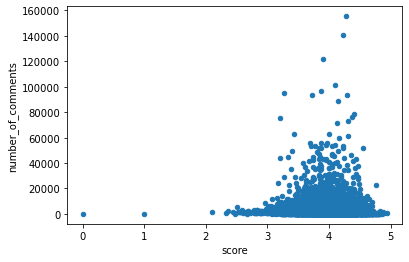

In [126]:
songs_edited.plot('score', 'number_of_comments', kind='scatter');

In [142]:
test['First_Customer_id'] = test['customer_id'].astype(str).str[0]
test['First_Customer_id'].unique()

test = test.merge(songs, how = 'outer' , on = 'song_id')
test[test['number_of_comments'].isnull()]['number_of_comments'] = 0

test = test.merge(songs_edited, how = 'outer' , on = 'song_id')
test.head()


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,customer_id,song_id,First_Customer_id,platform_id,released_year_x,language,number_of_comments_x,First_song_id,score,released_year_y,number_of_comments_y
0,J24644,5304,J,U64955,1989.0,NaN,416.0,U,3.468085,1989.0,416.0
1,M48487,5304,M,U64955,1989.0,NaN,416.0,U,3.468085,1989.0,416.0
2,H11522,5304,H,U64955,1989.0,NaN,416.0,U,3.468085,1989.0,416.0
3,G37991,5304,G,U64955,1989.0,NaN,416.0,U,3.468085,1989.0,416.0
4,O43869,5304,O,U64955,1989.0,NaN,416.0,U,3.468085,1989.0,416.0


In [145]:
test= test[test['song_id'] != 0]
test = test.rename(columns={'released_year_x': 'released_year', 
                              'number_of_comments_x': 'number_of_comments', 'score':'song_avg'})
test = test.drop(['released_year_y','number_of_comments_y'], axis=1)
test = test.merge(cust_edited, how = 'outer' , on = 'customer_id')
test = test.rename(columns={'released_year_x': 'released_year', 'song_id_x': 'song_id',
                              'number_of_comments_x': 'number_of_comments', 'score':'cust_avg'})
test = test.drop(['released_year_y','number_of_comments_y', 'song_id_y'], axis=1)
test= test[test['customer_id'] != 0]
test.head()

,customer_id,song_id,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id,song_avg,cust_avg
0,J24644,5304.0,J,U64955,1989.0,NaN,416.0,U,3.468085,3.566667
1,J24644,1423.0,J,Y10619,1995.0,eng,1714.0,Y,3.428571,3.566667
2,J24644,670.0,J,S11573,1979.0,en-US,2294.0,S,3.843137,3.566667
3,J24644,4465.0,J,V653396,1987.0,en-US,672.0,V,3.692308,3.566667
4,J24644,5.0,J,Q4671,1925.0,eng,51992.0,Q,3.846195,3.566667


In [151]:
test.shape

(670681, 10)

In [182]:
test.loc[test['First_song_id'].isnull(),['First_song_id']] = 'O'
test[test['First_song_id'].isnull()]

,customer_id,song_id,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id,song_avg,cust_avg


In [200]:
test.loc[test['song_avg']>0,['song_avg']].mean()

song_avg    3.935059
dtype: float64

In [195]:
test.loc[test['released_year'].isnull(),['released_year']] = 0
test.loc[test['released_year']==0,['released_year']] = 1979
test.loc[test['released_year']<0,['released_year']] = 1979
test[test['released_year']==0]

,customer_id,song_id,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id,song_avg,cust_avg,mark


In [201]:
test.loc[test['number_of_comments'].isnull(),['number_of_comments']] = 12903
test[test['number_of_comments'].isnull()]

,customer_id,song_id,First_Customer_id,platform_id,released_year,language,number_of_comments,First_song_id,song_avg,cust_avg,mark


In [ ]:
test.loc[test['song_avg'].isnull(),['song_avg']] = 3.935059
test[test['song_avg'].isnull()]

In [205]:
test.to_csv('edited_test.csv', index = False)